In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# Change the data types of several columns.
df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)
df.bike_id=df.bike_id.astype(str)
df.start_station_id=df.start_station_id.astype(str)
df.end_station_id=df.end_station_id.astype(str)

In [6]:
df.start_station_id=df.start_station_id.str[:-2]
df.end_station_id=df.end_station_id.str[:-2]

In [7]:
df.member_birth_year=df.member_birth_year.fillna(0)
df.member_birth_year=df.member_birth_year.astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### What is the structure of your dataset?
There are 183,412 rides with 15 features. Some are numeric (duration_sec, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, member_birth_year). The other datatypes include datetime, string (station ids, station names, bike id, user categoties). 

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out how different factors contribute to the duration of rides and the number of rides. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that there are certain stations busier than the others, meaning there are more rides associated with those stations. I also expect that younger members contribute to more rides. 

# Univariate Exploration
I'll start by looking at the distribution of the ride duration.

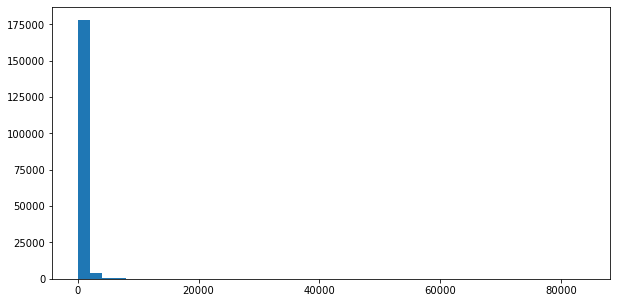

In [9]:
binsize=2000
bins=np.arange(0, 86000, 2000)
plt.figure(figsize=[10, 5])
plt.hist(data=df, x='duration_sec', bins=bins);

The duration time is severely skewed to the right, so let's zoom in to take a closer look:

Text(0, 0.5, 'Number of rides')

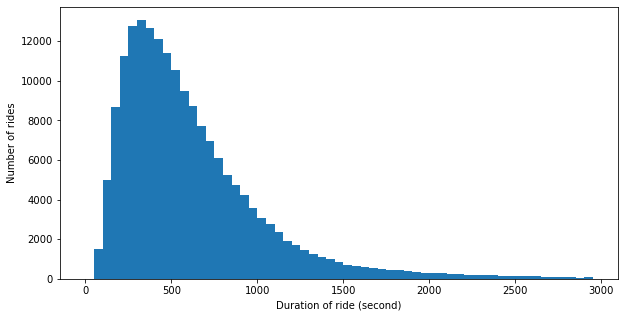

In [10]:

binsize=50
bins=np.arange(0, 3000, 50)
plt.figure(figsize=[10, 5])
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xlabel('Duration of ride (second)')
plt.ylabel('Number of rides')

In [11]:
np.log10(df.duration_sec.describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

The long tail suggests that the ride duration might be more suitable for a log scale. Now let's perform a log transformation.

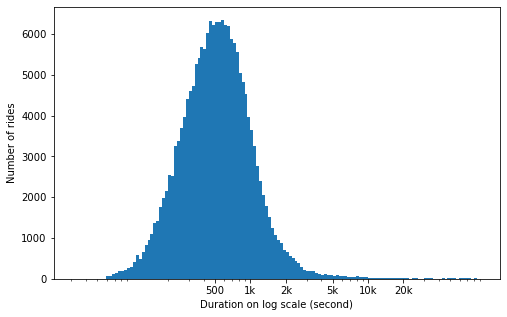

In [12]:

log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration on log scale (second)')
plt.ylabel('Number of rides')
plt.show()

The ride duration duration has a very long tail, with the vast majority of the rides within 2,000 seconds (~30mins). When plotted on a log-scale, the distribution looks like a normal distribution, with the center locating at around 500 seconds.
<br> Next up, the first independent variable of interest: member age

In [13]:
df.member_birth_year.describe()

count    183412.000000
mean       1895.366132
std         411.850439
min           0.000000
25%        1979.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [14]:
df.query('member_birth_year < 1900 & member_birth_year != 0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No


In [15]:
df.drop([27370], inplace=True);

In [16]:
df.query('member_birth_year < 1900 & member_birth_year != 0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


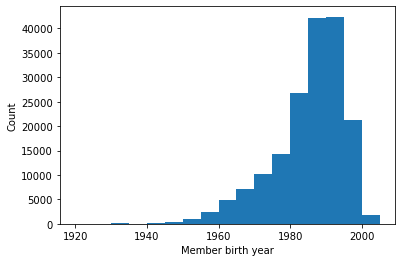

In [17]:
bins_age=np.arange(1920, 2010, 5)
plt.hist(data = df, x = 'member_birth_year', bins = bins_age);
plt.xlabel('Member birth year')
plt.ylabel('Count');

The distribution of member birth age is skewed to the left, meaning that most of the members are in the younger population. In particular, the peak of the distribution is at late 1980s and early 1990s. There seems to be one errenous entry: a woman is indicated to be born on 1878, and the row was dropped. 
<br> Next, let's investigate another variable: stations.

In [18]:
nstation=df.start_station_id.nunique()
print ('The average number of rides starting at one station:', df.start_station_id.shape[0]/nstation)

The average number of rides starting at one station: 555.790909090909


In [19]:
nstation=df.end_station_id.nunique()
print ('The average number of rides ending at one station:', df.end_station_id.shape[0]/nstation)

The average number of rides ending at one station: 555.790909090909


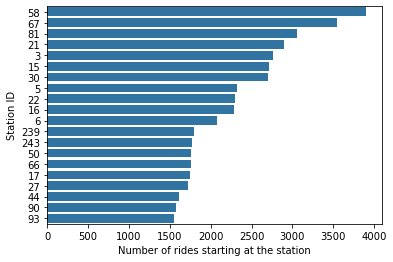

In [20]:
base_color=sb.color_palette()[0]
start=df.start_station_id.value_counts()
start_sub=start.head(20)
start_stations=start_sub.index
sb.countplot(data=df, y='start_station_id',order=start_stations, color=base_color);
plt.xlabel('Number of rides starting at the station')
plt.ylabel('Station ID');

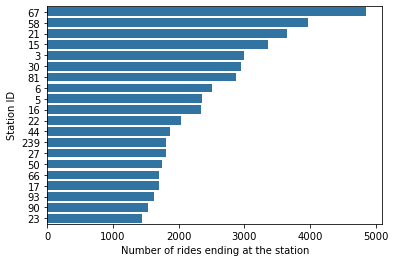

In [21]:
end=df.end_station_id.value_counts()
end_sub=end.head(20)
end_stations=end_sub.index
sb.countplot(data=df, y='end_station_id',order=end_stations, color=base_color);
plt.xlabel('Number of rides ending at the station')
plt.ylabel('Station ID');

Let's explore the relationship between members' gender and the total number of rides each group contribtues.

In [22]:
df.member_gender.value_counts()

Male      130651
Female     40843
Other       3652
Name: member_gender, dtype: int64

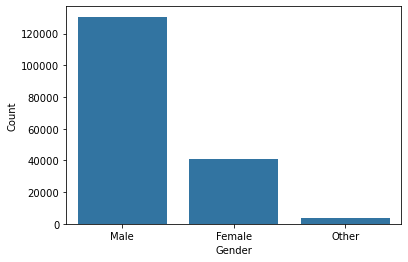

In [23]:
sb.countplot(data=df, x='member_gender', order=['Male','Female', 'Other'], color=base_color);
plt.xlabel('Gender')
plt.ylabel('Count');

Next, let's compare how different types of users contribute to the total number of rides. 

In [24]:
df.user_type.value_counts()

Subscriber    163544
Customer       19867
Name: user_type, dtype: int64

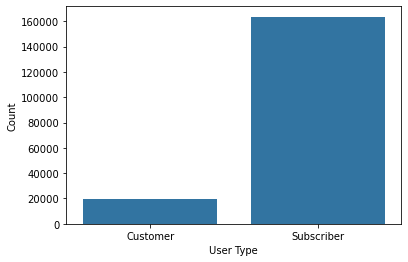

In [25]:
sb.countplot(data=df, x='user_type', color=base_color);
plt.xlabel('User Type')
plt.ylabel('Count');

After exploring different groups of riders, let's investigate how the number of rides varies throughout the week.

In [26]:
import datetime
dayofweek=df.start_time.dt.dayofweek
start_hour=df.start_time.dt.hour
end_hour=df.end_time.dt.hour

In [27]:
df.insert(16, 'day_of_week', dayofweek, True)
df.insert(17,'start_hour',start_hour, True)
df.insert(18,'end_hour',end_hour, True)

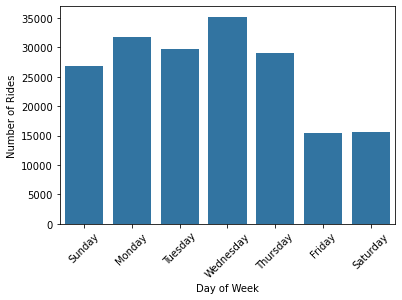

In [28]:
sb.countplot(data=df,x='day_of_week', color=base_color);
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],rotation=45);
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides');

According to the histogram, the numbers of rides on Friday and Saturday are about half of the rides on the other days. Now let's investigate how the number of rides varies throughout the day.

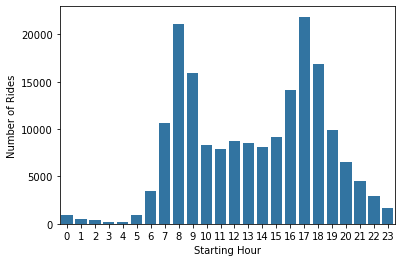

In [29]:
sb.countplot(data=df,x='start_hour', color=base_color);
plt.xlabel('Starting Hour')
plt.ylabel('Number of Rides');

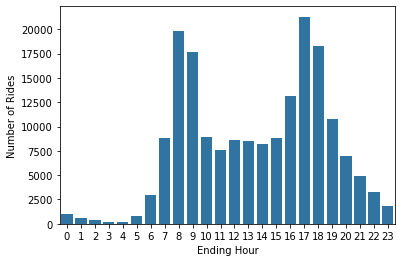

In [30]:
sb.countplot(data=df,x='end_hour', color=base_color);
plt.xlabel('Ending Hour')
plt.ylabel('Number of Rides');

# Bivariate Exploration
First, explore the relationship between ride duration and birth duration.

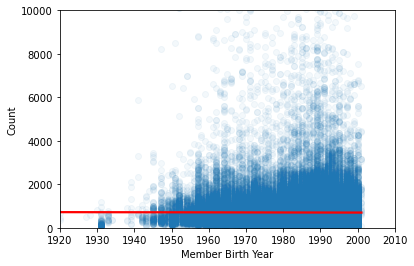

In [31]:
sb.regplot(data=df, x='member_birth_year',y='duration_sec', scatter_kws={'alpha':1/20},line_kws={"color": "red"});
plt.ylim(0,10000);
plt.xlim(1920, 2010);
plt.xlabel('Member Birth Year')
plt.ylabel('Count');

The scatterplot shows that even though younger members have more long-duration rides, there seems to be no correlation between the member age and ride duration. The reason is that even though there are more long rides for younger members, there are more short rides as well, and hence the average duration is not significantly impacted by the riders' age. Now let's investigate how different factors, including gender, user type, age groups, ride share, ride hour, can affect the ride duration

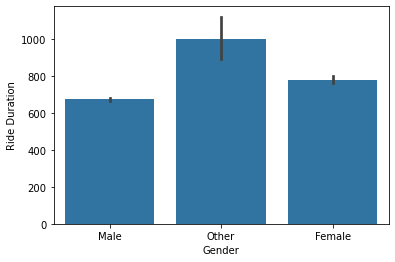

In [32]:
sb.barplot(data=df, x='member_gender',y='duration_sec',color=base_color);
plt.xlabel('Gender')
plt.ylabel('Ride Duration');

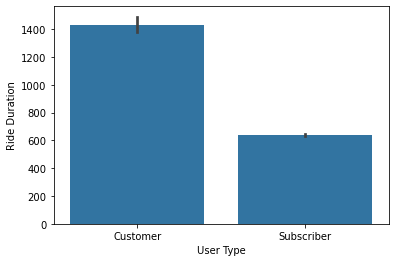

In [33]:
sb.barplot(data=df, x='user_type',y='duration_sec',color=base_color);
plt.xlabel('User Type')
plt.ylabel('Ride Duration');

In [34]:
df.insert(14, 'age_group', True)

In [35]:
bins_birth=[0, 1900, 1921, 1931, 1941, 1951, 1961, 1971, 1981, 1991, 2001, 2011]
labels=['Unknown','Over 100','90s','80s','70s','60s','50s','40s','30s','20s','Teens']
df.age_group=pd.cut(df.member_birth_year, bins=bins_birth, labels=labels, right=False)

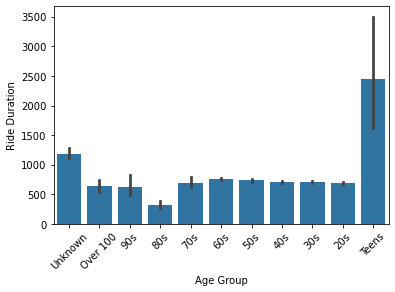

In [36]:
sb.barplot(data=df, x='age_group',y='duration_sec',color=base_color);
plt.xticks(rotation=45);
plt.xlabel('Age Group')
plt.ylabel('Ride Duration');

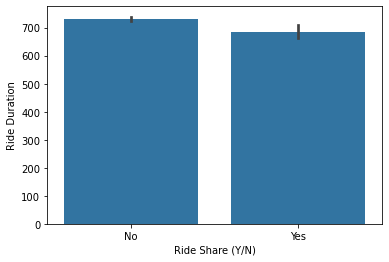

In [37]:
sb.barplot(data=df, x='bike_share_for_all_trip',y='duration_sec',color=base_color);
plt.xlabel('Ride Share (Y/N)')
plt.ylabel('Ride Duration');

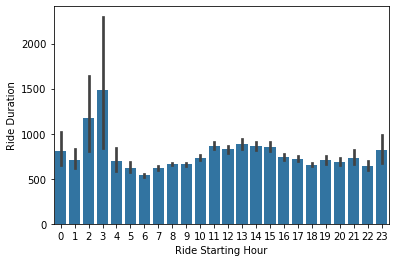

In [38]:
sb.barplot(data=df,x='start_hour', y='duration_sec',color=base_color);
plt.xlabel('Ride Starting Hour')
plt.ylabel('Ride Duration');

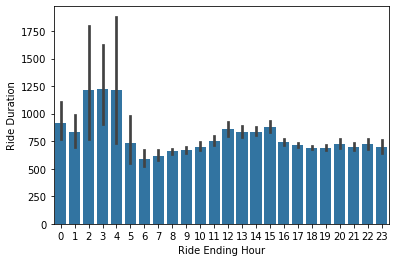

In [39]:
sb.barplot(data=df,x='end_hour', y='duration_sec',color=base_color);
plt.xlabel('Ride Ending Hour')
plt.ylabel('Ride Duration');

# Multivariate Exploration
This section investigate how the relationship between riders' age and ride duration might change with different types of riders/different day of the week. The biggest takeaway is: although members of different age have different number of rides and ride duration, the relationship of member age and ride duration is not impacted by rider type, gender, and day of the week.

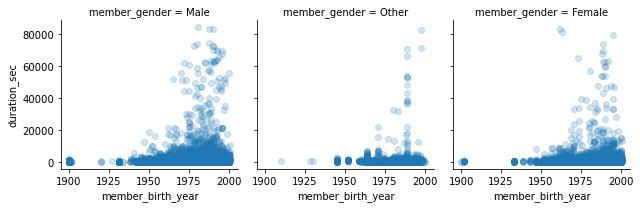

In [40]:
g=sb.FacetGrid(data=df, col='member_gender')
g=g.map(sb.regplot, 'member_birth_year','duration_sec',scatter_kws={'alpha':1/5},fit_reg=False);

There is no siginificant difference in terms of the distribution of the birth year and the ride duration. Now, let's examine the relationship between the ride duration, birth year, and user type.

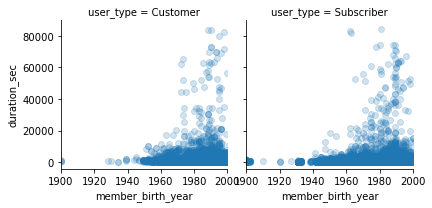

In [41]:
g=sb.FacetGrid(data=df, col='user_type')
g=g.map(sb.regplot, 'member_birth_year','duration_sec',scatter_kws={'alpha':1/5},fit_reg=False);
plt.xlim(1900, 2000);

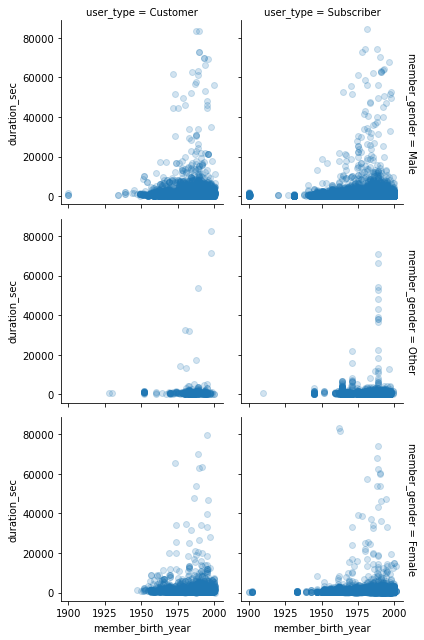

In [42]:
g=sb.FacetGrid(data=df, col='user_type', row='member_gender',margin_titles=True)
g.map(plt.scatter, 'member_birth_year','duration_sec', alpha=1/5)

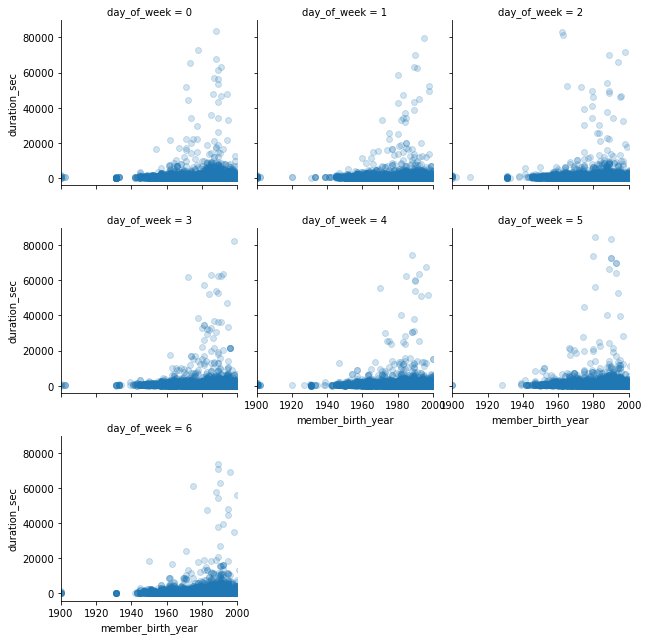

In [43]:
g=sb.FacetGrid(data=df, col='day_of_week', col_wrap=3)
g=g.map(sb.regplot, 'member_birth_year','duration_sec',scatter_kws={'alpha':1/5},fit_reg=False);
plt.xlim(1900, 2000);